## Import Libraries

In [129]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# For display
%matplotlib inline

# Setting format for not to display in scientific notation 
pd.options.display.float_format = '{:.2f}'.format

## Load the Pre-Processed data

In [130]:
raw_df = pd.read_csv("PreProcessed.csv")

In [131]:
raw_df.shape

(41984, 196)

## Eploring the dataset

In [132]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,actual_time_to_travel
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00


### Explore the response variable: Actual time to travel between the bus stops

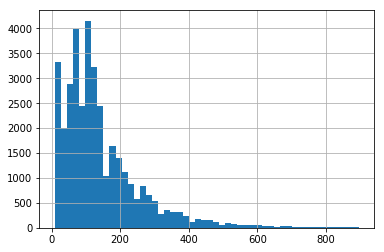

In [133]:
# Plot the historam
raw_df['actual_time_to_travel'].hist(bins = 50)

In [134]:
raw_df['actual_time_to_travel'].describe()

count   36199.00
mean      143.84
std       119.95
min         9.00
25%        70.00
50%       110.00
75%       186.00
max       897.00
Name: actual_time_to_travel, dtype: float64

In [135]:
# Check for Null Values
raw_df['actual_time_to_travel'].hasnans

True

In [136]:
# Drop Nan values
filtered_df = raw_df.dropna(subset=['actual_time_to_travel'])

In [137]:
filtered_df.shape

(36199, 196)

### Split into Train and Test datasets

In [154]:
X = filtered_df.loc[:,filtered_df.columns != 'actual_time_to_travel']
Y = filtered_df.actual_time_to_travel

In [155]:
X.shape

(36199, 195)

In [156]:
Y.shape

(36199,)

In [157]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [158]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
24476,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9540,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12299,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2929,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
38290,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


### Standardize The Data

In [159]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### Build the model

In [160]:
X_train.shape

(27149, 195)

In [242]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer: Same as input_dim with additional one for the bias term 
model.add(Dense(256, activation='relu', input_dim=195))

# Add one hidden layer: One hidden layer is sufficient for majority of the problems
# The optimal size of the hidden layer is usually between the size of the input and size of the output layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))


# Add an output layer 
model.add(Dense(1, activation='linear'))

In [243]:
from sklearn.metrics import r2_score

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics = ['mae'])

In [244]:
model.fit(X_train, Y_train,epochs=100, batch_size=256, verbose=1)

Epoch 1/100
27149/27149 [==============================] - 1s 54us/step - loss: 16584.3110 - mean_absolute_error: 91.2420
Epoch 2/100
27149/27149 [==============================] - 1s 33us/step - loss: 14289.1876 - mean_absolute_error: 85.1344
Epoch 3/100
27149/27149 [==============================] - 1s 33us/step - loss: 14104.0693 - mean_absolute_error: 84.7568
Epoch 4/100
27149/27149 [==============================] - 1s 34us/step - loss: 14000.4702 - mean_absolute_error: 84.5642
Epoch 5/100
27149/27149 [==============================] - 1s 32us/step - loss: 13893.9154 - mean_absolute_error: 84.3185
Epoch 6/100
27149/27149 [==============================] - 1s 33us/step - loss: 13807.1844 - mean_absolute_error: 84.0434
Epoch 7/100
27149/27149 [==============================] - 1s 33us/step - loss: 13701.1887 - mean_absolute_error: 83.7799
Epoch 8/100
27149/27149 [==============================] - 1s 34us/step - loss: 13629.8320 - mean_absolute_error: 83.5400
Epoch 9/100
27149/27149 

27149/27149 [==============================] - 1s 33us/step - loss: 1834.7152 - mean_absolute_error: 32.3908
Epoch 69/100
27149/27149 [==============================] - 1s 33us/step - loss: 1801.7397 - mean_absolute_error: 31.8245
Epoch 70/100
27149/27149 [==============================] - 1s 33us/step - loss: 1730.1377 - mean_absolute_error: 31.0595
Epoch 71/100
27149/27149 [==============================] - 1s 34us/step - loss: 1779.2531 - mean_absolute_error: 31.7253
Epoch 72/100
27149/27149 [==============================] - 1s 34us/step - loss: 1695.0309 - mean_absolute_error: 30.9208
Epoch 73/100
27149/27149 [==============================] - 1s 33us/step - loss: 1692.2795 - mean_absolute_error: 30.9113
Epoch 74/100
27149/27149 [==============================] - 1s 34us/step - loss: 1622.6142 - mean_absolute_error: 30.1450
Epoch 75/100
27149/27149 [==============================] - 1s 33us/step - loss: 1615.4535 - mean_absolute_error: 30.0392
Epoch 76/100
27149/27149 [===========

In [245]:
from sklearn.metrics import r2_score

Y_pred_train = model.predict(X_train)
r2Score = r2_score(Y_train, Y_pred_train) 
print(r2Score)

0.941744615648


In [246]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(Y_train, Y_pred_train)
print(mse_train)

832.772625574
